In [340]:
import numpy as np
import pandas as pd
#Read the companies.txt file
#Read the rounds.csv fle
companies = pd.read_csv("C:/Users/Vivek Reddy Chinasa/Desktop/notebooks/assignment1/companies.txt", sep='\t',encoding='iso-8859-1')
rounds = pd.read_csv("C:/Users/Vivek Reddy Chinasa/Desktop/notebooks/assignment1/rounds2.csv",encoding='iso-8859-1')

In [341]:
#total number of companies
companies.permalink.str.lower().nunique()


66368

In [342]:
#total number of unique companies in ounds
rounds.company_permalink.str.lower().nunique()

66370

In [343]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [344]:
companies['permalink'] = companies['permalink'].str.lower()

In [345]:
rounds['company_permalink'] = rounds['company_permalink'].str.lower()

In [346]:
companies['permalink'] 

0                                      /organization/-fame
1                                   /organization/-qounter
2                      /organization/-the-one-of-them-inc-
3                                    /organization/0-6-com
4                           /organization/004-technologies
                               ...                        
66363    /organization/zznode-science-and-technology-co...
66364                            /organization/zzzzapp-com
66365                                 /organization/ãeron
66366                               /organization/ãasys-2
66367    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: permalink, Length: 66368, dtype: object

In [347]:
rounds['company_permalink']

0                                       /organization/-fame
1                                    /organization/-qounter
2                                    /organization/-qounter
3                       /organization/-the-one-of-them-inc-
4                                     /organization/0-6-com
                                ...                        
114944                            /organization/zzzzapp-com
114945                            /organization/zzzzapp-com
114946                                 /organization/ãeron
114947                               /organization/ãasys-2
114948    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
Name: company_permalink, Length: 114949, dtype: object

In [55]:
rounds.rename(columns = {'company_permalink':'permalink'},inplace=True)

In [ ]:
#merging both dataframes to form a master_frame with all the companies from compamies dataframe.

In [169]:
master_frame= pd.merge(companies,rounds,how='left',on='permalink')

In [56]:

master_frame

In [57]:
colNames = pd.DataFrame(rounds[rounds['permalink'].str.contains( 'magnet-tech-')])


In [355]:
colNames

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
58474,/organization/magnet-tech-ç£çÿ³ç§æ,/funding-round/be2fb8789ec4e1902c2a7e1f7313ad3d,venture,A,16-01-2015,NaN


In [58]:
dupcolNames = pd.DataFrame(rounds[rounds['permalink'].str.contains( 'weiche-tech-')])

In [17]:
dupcolNames

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
109968,/organization/weiche-tech-åè½¦ç§æ,/funding-round/27b0cd2e0b75cbceb717343ea86c2c28,angel,NaN,16-06-2014,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN


In [ ]:
#As present above there are duplicates of the permalink because of the junk characters may be because of file format.

In [ ]:
#starting with data cleaning,removing unwanted columns which have null columns

In [59]:
master_frame.isnull().sum()


permalink                      0
name                           1
homepage_url                6134
category_list               3409
status                         0
country_code                8676
state_code                 10944
region                     10165
city                       10162
founded_at                 20521
funding_round_permalink        5
funding_round_type             5
funding_round_code         83808
funded_at                      5
raised_amount_usd          19989
dtype: int64

In [358]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [359]:
master_frame.isnull().all(axis=1).sum()

0

In [60]:
#removing column funding_round_code as we cannot delete or impute 72% data
master_frame = master_frame.drop('funding_round_code', axis=1)

In [61]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [337]:
master_frame[master_frame['raised_amount_usd'].isnull()]

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,master_category


In [62]:
master_frame['raised_amount_usd'].describe()

count    9.495800e+04
mean     1.042696e+07
std      1.148218e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680521e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [63]:
#as we can see the min is 0 and max is very huge number .There is lot of difference between mean adn max 
#we cannot impute the values
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [64]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64

In [65]:
master_frame['raised_amount_usd'].describe()

count    9.495800e+04
mean     1.042696e+07
std      1.148218e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680521e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [66]:
master_frame['raised_amount_usd'].min()

0.0

In [67]:
master_frame = master_frame.drop('founded_at', axis=1)

In [68]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [367]:
#As state_code,region city are not use ful we can drop those columns.
master_frame = master_frame.drop('city', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('state_code', axis=1)



In [368]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)


permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [369]:
master_frame['country_code'].describe()

count     89108
unique      134
top         USA
freq      62049
Name: country_code, dtype: object

In [370]:
master_frame['country_code'].isnull().sum()

5850

In [371]:
#As country_code values are small and wven if we delete the rows with country_code null we still have enough data
test_frame = master_frame[~master_frame['country_code'].isnull()]


In [36]:
test_frame

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
...,...,...,...,...,...,...,...,...,...,...
114940,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0
114941,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0


In [37]:
test_frame['country_code'].isnull().sum()

0

In [69]:
master_frame=master_frame[~master_frame['country_code'].isnull()]

In [373]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.00
name                       0.00
homepage_url               3.79
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [70]:
#dropping the column homepage_url as it is unimportant for our analysis and if we delete rows we will lose valuable data
master_frame = master_frame.drop('homepage_url', axis=1)


In [375]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [229]:
master_frame['category_list'].describe()

count             88529
unique            21317
top       Biotechnology
freq               7621
Name: category_list, dtype: object

In [71]:
master_frame['category_list'].isnull().sum()

579

In [72]:
master_frame_by_seg = master_frame.groupby('category_list')

In [44]:
master_frame_by_seg

In [73]:
master_frame_by_seg['raised_amount_usd'].sum()


category_list
3D Printing                                                                                                                                                                       18991456.0
3D Printing|3D Technology                                                                                                                                                            50500.0
3D Printing|3D Technology|Android|Artificial Intelligence|Drones|Enterprise Application|Entertainment|Entrepreneur|Games|Lasers|Mobile|Open Source|Robotics|Telecommunications      220000.0
3D Printing|3D Technology|Android|Games|iOS|Mobile|Mobile Games|Mobile Software Tools|Serious Games|Tablets|Video Games                                                            4750000.0
3D Printing|3D Technology|Audio|Mass Customization                                                                                                                                  212500.0
                                         

In [235]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [74]:
master_frame=master_frame[~master_frame['category_list'].isnull()] 
#removing master_frame with rows having category _list as null

In [377]:
master_frame

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
...,...,...,...,...,...,...,...,...,...
114940,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0
114941,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0


In [380]:
#We have 9 columns of data which is cleansed for analysis.
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)


permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [75]:
master_frame_by_seg = master_frame.groupby('funding_round_type')

In [76]:
master_frame_by_seg['raised_amount_usd'].mean().astype('int64')
#Finding average investment analysis in each funding_round_type

funding_round_type
angel                       971573
convertible_note           1337186
debt_financing            17167653
equity_crowdfunding         509897
grant                      4512698
non_equity_assistance       480753
post_ipo_debt            169451789
post_ipo_equity           66077058
private_equity            73938486
product_crowdfunding       1353226
secondary_market          84438532
seed                        747793
undisclosed               15891661
venture                   11724222
Name: raised_amount_usd, dtype: int64

In [79]:
master_frame_by_venture=master_frame[master_frame['funding_round_type']=='venture']

In [259]:
master_frame_by_venture

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
114929,/organization/zyraz-technology,Zyraz Technology,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7991547.0
114932,/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0
114934,/organization/zystor,Zystor,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0
114935,/organization/zytoprotec,Zytoprotec,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.0


In [339]:
master_frame_seg_country = master_frame.groupby('country_code').sum().astype('int64').sort_values('raised_amount_usd',ascending = False).head(9)

In [338]:
master_frame_seg_country_venture = master_frame_by_venture.groupby('country_code').sum().astype('int64').sort_values('raised_amount_usd',ascending = False).head(9)

In [248]:
master_frame.head(9)

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,master_category
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,Media,Entertainment
4,/organization/a-dance-for-me,A Dance for Me,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,26-03-2014,1090000.0,Media,Entertainment
5,/organization/akira-mobile,Akira Mobile,Media|Mobile|SMS|Telecommunications,operating,LTU,NaN,NaN,NaN,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,01-08-2012,18410.0,Media,Entertainment
6,/organization/all-day-media,ALL DAY MEDIA,Media|Social Media,operating,USA,CA,Los Angeles,Los Angeles,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,16-12-2014,2000000.0,Media,Entertainment
7,/organization/all-def-digital,All Def Digital,Media,operating,USA,CA,Los Angeles,Los Angeles,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,Media,Entertainment
8,/organization/america-s-real-deal,America's Real Deal,Media|News,operating,USA,UT,Salt Lake City,Bountiful,/funding-round/5fbb191b97ca9789a7196de703983240,equity_crowdfunding,19-08-2011,670000.0,Media,Entertainment


In [388]:
master_frame_seg_country

,raised_amount_usd
country_code,
USA,665782068320
CHN,75207065796
GBR,32436812830
IND,27383831560
CAN,18304117219
RUS,11277449213
DEU,9970512161
ISR,9655727871
FRA,9022653438


In [252]:
master_frame_seg_country_venture.reset_index()
#third analysis to find top9 countries in these USA,GBR and IND are English speaking countries

,country_code,raised_amount_usd
0,USA,420068029342
1,CHN,39338918773
2,GBR,20072813004
3,IND,14261508718
4,CAN,9482217668
5,FRA,7226851352
6,ISR,6854350477
7,DEU,6306921981
8,JPN,3167647127


In [82]:
category_list_column = master_frame['category_list']
print(category_list_column)

0                                                     Media
2         Application Platforms|Real Time|Social Network...
4                                               Curated Web
6                                                     Games
7                                             Biotechnology
                                ...                        
114940          Advertising|Mobile|Web Development|Wireless
114941          Advertising|Mobile|Web Development|Wireless
114942          Advertising|Mobile|Web Development|Wireless
114943          Advertising|Mobile|Web Development|Wireless
114945    Consumer Electronics|Internet of Things|Teleco...
Name: category_list, Length: 88529, dtype: object


In [101]:
master_frame['primary_sector'] = master_frame['category_list'].str.split('|').str[0]

In [102]:
master_frame['primary_sector']

0                         Media
2         Application Platforms
4                   Curated Web
6                         Games
7                 Biotechnology
                  ...          
114940              Advertising
114941              Advertising
114942              Advertising
114943              Advertising
114945     Consumer Electronics
Name: primary_sector, Length: 88529, dtype: object

In [392]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
primary_sector             0.0
dtype: float64

In [85]:
mapping = pd.read_csv("C:/Users/Vivek Reddy Chinasa/Desktop/notebooks/assignment1/mapping.csv",encoding='iso-8859-1')
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [87]:
#mapping=mapping[~mapping['category_list'].isnull()]
#mapping
sector_mapping = mapping.melt(id_vars="category_list",var_name="master_category")

In [88]:
sector_mapping

,category_list,master_category,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
6187,Wholesale,"Social, Finance, Analytics, Advertising",0
6188,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6189,Wireless,"Social, Finance, Analytics, Advertising",0
6190,Women,"Social, Finance, Analytics, Advertising",0


In [89]:
sector_mapping = sector_mapping.loc[~(sector_mapping["value"]==0) ]

In [90]:
sector_mapping=sector_mapping.drop(columns="value")

In [98]:
sector_mapping.rename(columns = {'category_list':'primary_sector'},inplace=True)

In [100]:
sector_mapping

,primary_sector,master_category
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [ ]:
#first we are merging based on left join then inner but in the left join we can see that there are some companies with no
#main_category
#hence i would prefer inner join and many spelling mistakes in the given data.They can be fixed in using the below code.
#But chode to remove these as there is lot of manual work involved.

#mapping.loc[22,:]

#changing the value to Analytics as it is present as 'A0lytics' assuming it as 'Analytics'
#mapping.at[22,'category_list']='Analytics'

#mapping.set_index('category_list', inplace = True)

#for index, row in master_frame.iterrows(): 
#    value = row["primary_sector"] 
#    if(value not in ('Cause Marketing' , 'English-Speaking','Real Estate Investors')):
#        category_values=mapping.loc[value,:].values.tolist()    
#    index=category_values.index(1)
#    print(mapping.columns[index])

#mapping.reset_index(inplace = True)

#mapping[mapping['category_list']=='Fi0nce'].index[0]

#mapping.at[273,'category_list']='Finance'


#mapping[mapping['category_list']=='Fi0ncial Services'].index[0]

#mapping.at[276,'category_list']='Financial Services'

#mapping[mapping['category_list']=='Nanotechnology'].index[0]


#mapping[mapping['category_list']=='Fi0nce Technology'].index[0] #Finance Technology

#mapping.at[274,'category_list']='Finance Technology'

#mapping[mapping['category_list']=='Business A0lytics'].index[0] #Business Analytics

#mapping.at[471,'category_list']='Nanotechnology'

#mapping.at[79,'category_list']='Business Analytics'

#mapping[mapping['category_list']=='Contact Ma0gement'].index[0]

#mapping.at[145,'category_list']='Contact Management'

#mapping[mapping['category_list']=='Career Ma0gement'].index[0]#Career Management

#mapping.at[91,'category_list']='Career Management'

#mapping[mapping['category_list']=='Big Data A0lytics'].index[0]#Big Data Analytics

#mapping.at[59,'category_list']='Big Data Analytics'

#mapping[mapping['category_list']=='Cloud Ma0gement'].index[0]#Cloud Management

#mapping.at[114,'category_list']='Cloud Management'

#mapping[mapping['category_list']=='Risk Ma0gement'].index[0]#Risk Management

#mapping.at[575,'category_list']='Risk Management'

#mapping[mapping['category_list']=='Document Ma0gement'].index[0]#Document Management

#mapping.at[210,'category_list']='Document Management'

#mapping[mapping['category_list']=='Digital Sig0ge'].index[0]#Digital Signage

#mapping.at[199,'category_list']='Digital Signage'

#mapping[mapping['category_list']=='Jour0lism'].index[0]#Journalism

#mapping.at[391,'category_list']='Journalism'

#mapping[mapping['category_list']=='Energy Ma0gement'].index[0]#Energy Management

#mapping.at[240,'category_list']='Energy Management'

#mapping[mapping['category_list']=='Waste Ma0gement'].index[0]#Waste Management

#mapping.at[672,'category_list']='Waste Management'

#mapping[mapping['category_list']=='Alter0tive Medicine'].index[0]#Alternative Medicine

#mapping.at[20,'category_list']='Alternative Medicine'

#Real Estate Investors

#mapping[mapping['category_list']=='Investment Ma0gement'].index[0]#Investment Management

#mapping.at[384,'category_list']='Investment Management'

#mapping[mapping['category_list']=='Intellectual Asset Ma0gement'].index[0]#Intellectual Asset Management

#mapping.at[372,'category_list']='Intellectual Asset Management'

#mapping[mapping['category_list']=='Identity Ma0gement'].index[0]#Identity Management

#mapping.at[353,'category_list']='Identity Management'

#mapping[mapping['category_list']=='Lead Ma0gement'].index[0]#Lead Management

#mapping.at[400,'category_list']='Lead Management'






















In [103]:
master_frame_merged1= pd.merge(master_frame,sector_mapping,how='left',on='primary_sector')

In [401]:
master_frame_merged1 # this is to check the total values in merged frame.

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,master_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,Application Platforms,"News, Search and Messaging"
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,Curated Web,"News, Search and Messaging"
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,Games,Entertainment
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,Biotechnology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...
88524,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0,Advertising,"Social, Finance, Analytics, Advertising"
88525,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0,Advertising,"Social, Finance, Analytics, Advertising"
88526,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0,Advertising,"Social, Finance, Analytics, Advertising"
88527,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0,Advertising,"Social, Finance, Analytics, Advertising"


In [105]:
master_frame_merged_inner= pd.merge(master_frame,sector_mapping,how='inner',on='primary_sector')

In [348]:
master_frame_merged_inner

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,master_category
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,Media,Entertainment
4,/organization/a-dance-for-me,A Dance for Me,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,26-03-2014,1090000.0,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82123,/organization/wing-ma-am,Wing Ma'am,Gay & Lesbian,operating,USA,PA,Pittsburgh,Pittsburgh,/funding-round/13d72bd46f529ee00ff699254d9d1c16,seed,09-06-2013,25000.0,Gay & Lesbian,Others
82124,/organization/wiselike,Wiselike,Q&A,operating,USA,CA,SF Bay Area,San Francisco,/funding-round/e313727defb87ca1dcb8ec9f6d091e47,seed,31-08-2015,1250000.0,Q&A,"News, Search and Messaging"
82125,/organization/yes-no,yes.no,Q&A|Social Network Media,closed,ISR,5,Tel Aviv,Tel Aviv,/funding-round/e51932c2afebd10c5e8c08b94b57bcb7,seed,01-05-2015,1000000.0,Q&A,"News, Search and Messaging"
82126,/organization/youcruit,Youcruit,Micro-Enterprises|Recruiting|Small and Medium ...,operating,SWE,27,Malmo,MalmÃ¶,/funding-round/31fe44e42294821ad500ab67cb62e8c3,angel,06-02-2014,447037.0,Micro-Enterprises,Others


In [340]:
master_frame_merged_inner.describe().astype('int64')

,raised_amount_usd
count,82128
mean,10597071
std,115730713
min,0
25%,368928
50%,1800000
75%,7200000
max,21271935000


In [324]:
master_frame_merged1.describe().astype('int64')

,raised_amount_usd
count,88093
mean,10478518
std,112057989
min,0
25%,375000
50%,1800000
75%,7100000
max,21271935000


In [405]:
master_frame #output of 4th checkpoint

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,master_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,Media,Entertainment
4,/organization/a-dance-for-me,A Dance for Me,Media|News|Photo Sharing|Video,operating,USA,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,26-03-2014,1090000.0,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...
82123,/organization/wing-ma-am,Wing Ma'am,Gay & Lesbian,operating,USA,/funding-round/13d72bd46f529ee00ff699254d9d1c16,seed,09-06-2013,25000.0,Gay & Lesbian,Others
82124,/organization/wiselike,Wiselike,Q&A,operating,USA,/funding-round/e313727defb87ca1dcb8ec9f6d091e47,seed,31-08-2015,1250000.0,Q&A,"News, Search and Messaging"
82125,/organization/yes-no,yes.no,Q&A|Social Network Media,closed,ISR,/funding-round/e51932c2afebd10c5e8c08b94b57bcb7,seed,01-05-2015,1000000.0,Q&A,"News, Search and Messaging"
82126,/organization/youcruit,Youcruit,Micro-Enterprises|Recruiting|Small and Medium ...,operating,SWE,/funding-round/31fe44e42294821ad500ab67cb62e8c3,angel,06-02-2014,447037.0,Micro-Enterprises,Others


In [106]:
master_frame=pd.merge(master_frame,sector_mapping,how='inner',on='primary_sector')


In [326]:
master_frame.describe().astype('int64')

,raised_amount_usd
count,82128
mean,10597071
std,115730713
min,0
25%,368928
50%,1800000
75%,7200000
max,21271935000


In [151]:
D1=master_frame[(master_frame.country_code =='USA') & (master_frame.funding_round_type=='venture') & (master_frame.raised_amount_usd > 5000000)& (master_frame.raised_amount_usd < 15000000) ]
D1.describe().astype('int64')

,raised_amount_usd
count,9227
mean,8929394
std,2539184
min,5000001
25%,6800000
50%,8600000
75%,10700000
max,14999999


In [ ]:
#preparing top 3 countries data country1,country2,country3

In [152]:
temp_frame_D1=D1.master_category.value_counts().rename_axis('master_category').reset_index(name='master_count') #NO.OF INVESTMENTS

In [165]:
sum_frame_D1=D1.groupby('master_category').raised_amount_usd.agg([('sum', 'sum')]).astype('int64').reset_index() #TOTAL INVESTMENT

In [153]:
D1=pd.merge(D1,temp_frame_D1,how='left',on='master_category')

In [166]:
D1=pd.merge(D1,sum_frame_D1,how='left',on='master_category')

In [295]:
D1_plot=D1.groupby(['country_code','master_category']).count()

In [297]:
D1_plot.reset_index()

,country_code,master_category,permalink,name,category_list,status,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,master_count,sum
0,USA,Automotive & Sports,142,142,142,142,142,142,142,142,142,142,142,142,142,142
1,USA,Cleantech / Semiconductors,1950,1950,1950,1950,1950,1948,1948,1950,1950,1950,1950,1950,1950,1950
2,USA,Entertainment,470,470,470,470,470,470,470,470,470,470,470,470,470,470
3,USA,Health,759,759,759,759,759,759,759,759,759,759,759,759,759,759
4,USA,Manufacturing,691,691,691,691,691,690,690,691,691,691,691,691,691,691
5,USA,"News, Search and Messaging",1265,1265,1265,1265,1264,1263,1263,1265,1265,1265,1265,1265,1265,1265
6,USA,Others,2400,2400,2400,2400,2399,2399,2399,2400,2400,2400,2400,2400,2400,2400
7,USA,"Social, Finance, Analytics, Advertising",1550,1550,1550,1550,1550,1547,1547,1550,1550,1550,1550,1550,1550,1550


,country_code,master_category,master_count
0,USA,Others,2400
1,USA,Cleantech / Semiconductors,1950
2,USA,"Social, Finance, Analytics, Advertising",1550


In [407]:
D1['raised_amount_usd'].sum().astype('int64') #TOTAL INVESTMENT IN COUNTRY 1

82391524549

In [155]:
D2=master_frame[(master_frame.country_code =='GBR') & (master_frame.funding_round_type=='venture') & (master_frame.raised_amount_usd > 5000000)& (master_frame.raised_amount_usd < 15000000)]
D2.describe().astype('int64')

,raised_amount_usd
count,524
mean,8766611
std,2598379
min,5014644
25%,6484790
50%,8234832
75%,10548776
max,14906222


In [156]:
temp_frame_D2=D2.master_category.value_counts().rename_axis('master_category').reset_index(name='master_count')#NUMBER OF COUNTS IN COUNTRY 2

In [140]:
D2.master_category.value_counts() 

Others                                     126
Cleantech / Semiconductors                 123
Social, Finance, Analytics, Advertising     89
News, Search and Messaging                  65
Entertainment                               46
Manufacturing                               38
Health                                      23
Automotive & Sports                         14
Name: master_category, dtype: int64

In [157]:
D2=pd.merge(D2,temp_frame_D2,how='left',on='master_category')

In [171]:
sum_frame_D2=D2.groupby('master_category').raised_amount_usd.agg([('sum', 'sum')]).astype('int64').reset_index()  #TOTAL INVESTMENT ACCORDNG TO MAIN SECTOR

In [172]:
D2=pd.merge(D2,sum_frame_D2,how='left',on='master_category')

In [173]:
D2

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,master_category,master_count,sum
0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,Media,Entertainment,46,401511059
1,/organization/common-interest-communities,Common Interest Communities,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,09-07-2014,10000000.0,Application Platforms,"News, Search and Messaging",65,565746235
2,/organization/geospock-ltd-,GeoSpock Ltd.,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,01-10-2014,5460000.0,Application Platforms,"News, Search and Messaging",65,565746235
3,/organization/geospock-ltd-,GeoSpock Ltd.,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,05-10-2015,5400000.0,Application Platforms,"News, Search and Messaging",65,565746235
4,/organization/tao-group-2,Tao Group,Application Platforms|Consumer Electronics,operating,GBR,K7,London,Reading,/funding-round/ad088f1deeda09f3338adfc324e32dab,venture,06-05-2004,7000000.0,Application Platforms,"News, Search and Messaging",65,565746235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,/organization/canburg,Canburg,Furniture,operating,GBR,P8,GBR - Other,Devizes,/funding-round/03b21f985fbae27d9ace931e02f2a7cd,venture,15-09-2014,13010774.0,Furniture,Manufacturing,38,331940335
520,/organization/songkick,Songkick,Concerts|Music,operating,GBR,H9,London,London,/funding-round/0698b9660362675cedb52b8d064857a1,venture,08-03-2012,10000000.0,Concerts,Entertainment,46,401511059
521,/organization/e-leathergroup,E-LeatherGroup,Textiles,operating,GBR,K3,Peterborough,Peterborough,/funding-round/d3d71804ec6ff565dfaf89938a657ee8,venture,21-05-2014,8425073.0,Textiles,Others,126,1094124289
522,/organization/stingray-geophysical,Stingray Geophysical,Gas|Oil|Services,operating,GBR,N7,London,Guildford,/funding-round/6fdf5c9dc4be9d883a18fdbbe00c6209,venture,23-03-2006,11460000.0,Gas,Cleantech / Semiconductors,123,1096905008


In [422]:
D2['raised_amount_usd'].sum().astype('int64') #TOTAL INVESTMENT IN COUNTRY 2 

4593704358

In [158]:
D3=master_frame[(master_frame.country_code=='IND') & (master_frame.funding_round_type=='venture') & (master_frame.raised_amount_usd > 5000000)& (master_frame.raised_amount_usd < 15000000)]


In [427]:
D3.describe().astype('int64')

,raised_amount_usd
count,222
mean,9002421
std,2340707
min,5100000
25%,7000000
50%,9000000
75%,10000000
max,14750000


In [159]:
temp_frame_D3=D3.master_category.value_counts().rename_axis('master_category').reset_index(name='master_count') #NUMBER OF INVESTMENTS IN COUNTRY 3

In [414]:
D1_seg_sector = D1.groupby('master_category')

In [160]:
D3=pd.merge(D3,temp_frame_D3,how='left',on='master_category')

In [174]:
sum_frame_D3=D3.groupby('master_category').raised_amount_usd.agg([('sum', 'sum')]).astype('int64').reset_index() #TOTAL INVESTMENT IN COUNTRY 3

In [175]:
D3=pd.merge(D3,sum_frame_D3,how='left',on='master_category')

In [176]:
D3

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,master_category,master_count,sum
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media,Entertainment,23,200830000
1,/organization/babajob,Babajob,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,28-04-2015,10000000.0,Curated Web,"News, Search and Messaging",41,368834545
2,/organization/bharat-matrimony,Bharat Matrimony,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,05-02-2008,11750000.0,Curated Web,"News, Search and Messaging",41,368834545
3,/organization/bluestone-com,Bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,18-03-2014,10000000.0,Curated Web,"News, Search and Messaging",41,368834545
4,/organization/fourinteractive,Four Interactive,Curated Web,operating,IND,19,Bangalore,Bangalore,/funding-round/a0ef5f6e0c69a9060c1649c076999336,venture,01-09-2007,10000000.0,Curated Web,"News, Search and Messaging",41,368834545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,/organization/vserv,Vserv,Emerging Markets|Mobile Advertising|Mobile Com...,operating,IND,16,Mumbai,Mumbai,/funding-round/6442af712aaab254abcae2fe3fea9bc9,venture,02-03-2015,11000000.0,Emerging Markets,Others,77,697409507
218,/organization/zopnow,ZopNow,Groceries|Logistics,operating,IND,19,Bangalore,Bangalore,/funding-round/a0fa8c6ccaa3f11f3f0f196e03ff7449,venture,13-04-2015,10000000.0,Groceries,Manufacturing,18,165900000
219,/organization/hopscotch-4,Hopscotch,Baby Accessories|Consumer Goods|E-Commerce|Kid...,operating,IND,16,Mumbai,Mumbai,/funding-round/5e9877df18f0a9234f7c15db50f076ae,venture,20-01-2015,10800000.0,Baby Accessories,Health,17,157740000
220,/organization/easylink,EasyLink,Web Design|Web Development|Web Hosting,ipo,IND,25,Chennai,Chennai,/funding-round/f92ac5893a7701a416e76b8067f45e95,venture,13-04-2006,5400000.0,Web Design,"News, Search and Messaging",41,368834545


In [144]:
D3['master_category_count'].count()

222

Others                                     77
News, Search and Messaging                 41
Social, Finance, Analytics, Advertising    25
Entertainment                              23
Manufacturing                              18
Health                                     17
Cleantech / Semiconductors                 14
Automotive & Sports                         7
Name: master_category, dtype: int64

In [415]:
D1_seg_sector.sum().astype('int64')

,raised_amount_usd
master_category,
Automotive & Sports,1269104361
Cleantech / Semiconductors,17796003033
Entertainment,4040212982
Health,6855859357
Manufacturing,6228553378
"News, Search and Messaging",11076816094
Others,21534280296
"Social, Finance, Analytics, Advertising",13590695048


In [417]:
D1_seg_sector.describe().astype('int64')

raised_amount_usd                    \
                                                    count     mean      std   
master_category                                                               
Automotive & Sports                                   142  8937354  2622485   
Cleantech / Semiconductors                           1950  9126155  2622888   
Entertainment                                         470  8596197  2455617   
Health                                                759  9032752  2588451   
Manufacturing                                         691  9013825  2561591   
News, Search and Messaging                           1265  8756376  2429139   
Others                                               2400  8972616  2517835   
Social, Finance, Analytics, Advertising              1550  8768190  2512924   

                                                                              \
                                             min      25%      50%       75%   
master_category                                                                
Automotive & Sports                      5060000  6500000  9000000  10975000   
Cleantech / Semiconductors               5000001  7000000  9000000  11000000   
Entertainment                            5000006  6500000  8000000  10000000   
Health                                   5002957  6800000  8839821  11000000   
Manufacturing                            5015970  6999999  9000000  10630800   
News, Search and Messaging               5000001  6750000  8300000  10000054   
Others                                   5000001  7000000  8700000  10800000   
Social, Finance, Analytics, Advertising  5000006  6600000  8120000  10200000   

                                                   
                                              max  
master_category                                    
Automotive & Sports                      14800000  
Cleantech / Semiconductors               14999999  
Entertainment                            14700000  
Health                                   14838895  
Manufacturing                            14900000  
News, Search and Messaging               14999999  
Others                                   14999999  
Social, Finance, Analytics, Advertising  14999997

In [419]:
D1_seg_sector['raised_amount_usd'].max()

master_category
Automotive & Sports                        14800000.0
Cleantech / Semiconductors                 14999999.0
Entertainment                              14700000.0
Health                                     14838895.0
Manufacturing                              14900000.0
News, Search and Messaging                 14999999.0
Others                                     14999999.0
Social, Finance, Analytics, Advertising    14999997.0
Name: raised_amount_usd, dtype: float64

In [258]:
D1.loc[D1['raised_amount_usd']==14999999.0]

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,master_category,master_count,sum
4367,/organization/spidercloud-wireless,SpiderCloud Wireless,Enterprise Software,operating,USA,CA,SF Bay Area,San Jose,/funding-round/f075bcbb79bf46485b861e01aaad62d8,venture,06-01-2015,14999999.0,Enterprise Software,Others,2400,21534280296
6355,/organization/luminal,Luminal,Cloud Computing|Infrastructure|Security|Software,operating,USA,MD,Hagerstown,Frederick,/funding-round/5e6ecf78c82785c1dc6dd9ba8d76a9d9,venture,31-07-2015,14999999.0,Cloud Computing,"News, Search and Messaging",1265,11076816094
6939,/organization/intermolecular,Intermolecular,Semiconductors,ipo,USA,CA,SF Bay Area,San Jose,/funding-round/d1df05942624a86ffad2cc3fd6e11ea5,venture,10-03-2011,14999999.0,Semiconductors,Cleantech / Semiconductors,1950,17796003033
7105,/organization/zenverge,Zenverge,Semiconductors,acquired,USA,CA,SF Bay Area,Cupertino,/funding-round/f6f427e7f16677297e285205fafd351d,venture,31-10-2007,14999999.0,Semiconductors,Cleantech / Semiconductors,1950,17796003033


In [423]:
D2_seg_sector = D2.groupby('master_category')

In [425]:
D2_seg_sector.describe().astype('int64')

raised_amount_usd                    \
                                                    count     mean      std   
master_category                                                               
Automotive & Sports                                    14  9789397  3075451   
Cleantech / Semiconductors                            123  8917926  2825811   
Entertainment                                          46  8728501  2248878   
Health                                                 23  9110326  3086939   
Manufacturing                                          38  8735271  2505890   
News, Search and Messaging                             65  8703788  2432709   
Others                                                126  8683526  2588136   
Social, Finance, Analytics, Advertising                89  8504363  2432633   

                                                                              \
                                             min      25%      50%       75%   
master_category                                                                
Automotive & Sports                      5133089  7316745  9672897  12300535   
Cleantech / Semiconductors               5014644  6265189  8420000  11470000   
Entertainment                            5095630  7015000  8652954  10136282   
Health                                   5200000  6427293  7910327  11674721   
Manufacturing                            5303380  6715958  8019960  10000000   
News, Search and Messaging               5188839  6500000  8300000  10300000   
Others                                   5023000  6387742  8028035  10000000   
Social, Finance, Analytics, Advertising  5015782  6200000  8000000  10334077   

                                                   
                                              max  
master_category                                    
Automotive & Sports                      14500000  
Cleantech / Semiconductors               14906222  
Entertainment                            13000000  
Health                                   14300000  
Manufacturing                            14529275  
News, Search and Messaging               13381200  
Others                                   14656237  
Social, Finance, Analytics, Advertising  14448230

In [257]:
D2_seg_sector['raised_amount_usd'].max()

NameError: name 'D2_seg_sector' is not defined

In [428]:
D3_seg_sector = D3.groupby('master_category')

In [429]:
D3_seg_sector.describe().astype('int64')

raised_amount_usd                    \
                                                    count     mean      std   
master_category                                                               
Automotive & Sports                                     7  9557142  2640616   
Cleantech / Semiconductors                             14  8955714  2571679   
Entertainment                                          23  8731739  2070240   
Health                                                 17  9278823  1844118   
Manufacturing                                          18  9216666  2374372   
News, Search and Messaging                             41  8995964  2223220   
Others                                                 77  9057266  2502169   
Social, Finance, Analytics, Advertising                25  8621740  2542149   

                                                                               \
                                             min      25%       50%       75%   
master_category                                                                 
Automotive & Sports                      6400000  7250000  10000000  11500000   
Cleantech / Semiconductors               5530000  7400000   8300000   9950000   
Entertainment                            5400000  7500000   8750000  10000000   
Health                                   6000000  8400000   9500000  10000000   
Manufacturing                            5700000  8000000   9800000  10000000   
News, Search and Messaging               5400000  7000000  10000000  10000000   
Others                                   5100000  7000000   9000000  10400000   
Social, Finance, Analytics, Advertising  5400000  6000000   9000000  10000000   

                                                   
                                              max  
master_category                                    
Automotive & Sports                      13000000  
Cleantech / Semiconductors               14000000  
Entertainment                            14500000  
Health                                   13080000  
Manufacturing                            14750000  
News, Search and Messaging               14000000  
Others                                   14000000  
Social, Finance, Analytics, Advertising  14000000

In [432]:
D3_seg_sector['raised_amount_usd'].max()

master_category
Automotive & Sports                        13000000.0
Cleantech / Semiconductors                 14000000.0
Entertainment                              14500000.0
Health                                     13080000.0
Manufacturing                              14750000.0
News, Search and Messaging                 14000000.0
Others                                     14000000.0
Social, Finance, Analytics, Advertising    14000000.0
Name: raised_amount_usd, dtype: float64

In [433]:
D3['raised_amount_usd'].sum().astype('int64')

1998537552

In [ ]:
#HERE COMPLETES DATA FOR CHECK POINT 5 ANALYSIS

In [ ]:
# THE DATA PREPARATION FOR CHECK POINT 6 STARTS

In [219]:
temp=master_frame.groupby('funding_round_type').raised_amount_usd.agg([('type_sum', 'sum'),('type_mean','mean')]).astype('int64').reset_index()
#temp.describe()
temp

,funding_round_type,type_sum,type_mean
0,angel,3870437070,965196
1,convertible_note,1673970248,1390340
2,debt_financing,105028314312,17265874
3,equity_crowdfunding,542311527,523466
4,grant,8608973854,4735409
5,non_equity_assistance,27695203,477503
6,post_ipo_debt,24737120256,169432330
7,post_ipo_equity,38061737630,67365907
8,private_equity,126825216322,75401436
9,product_crowdfunding,428448395,1330585


In [218]:

temp=master_frame.groupby('funding_round_type').raised_amount_usd.agg([('type_sum', 'sum'),('type_mean','mean')]).astype('int64').reset_index()
#temp.describe()
temp
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)
temp['type_sum']=round(100*(temp['type_sum']/master_frame.raised_amount_usd.sum()),2)
funding_types=['venture','angel','seed','private_equity']
master_frame_type=temp.loc[temp.funding_round_type.isin(funding_types) ]
master_frame_type
#final_df=temp


,funding_round_type,type_sum,type_mean
0,angel,0.44,965196
8,private_equity,14.57,75401436
11,seed,1.64,741371
13,venture,60.23,11728983


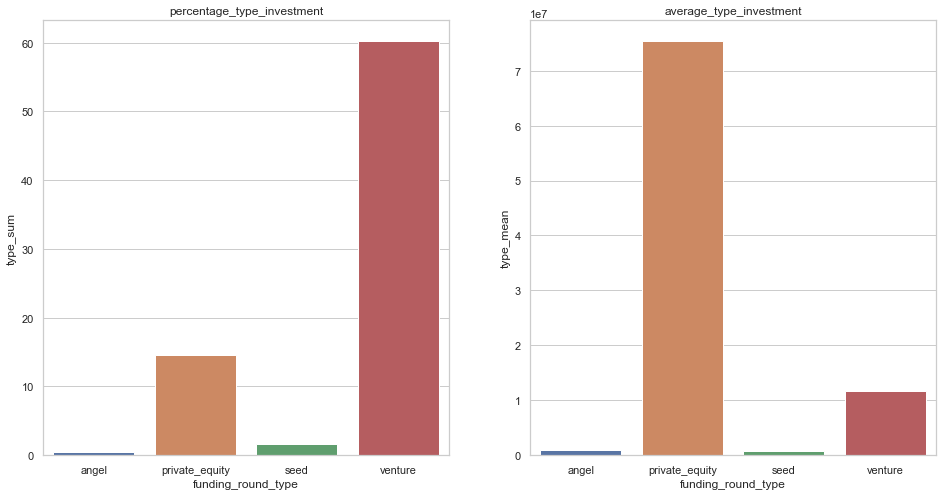

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('percentage_type_investment')
sns.barplot(x='funding_round_type', y='type_sum', data=master_frame_type)

plt.subplot(1, 2, 2)
plt.title('average_type_investment')
sns.barplot(x='funding_round_type', y='type_mean', data=master_frame_type)

plt.show()

In [ ]:
# WE CAN CLEARLY SEE THAT VENTURE HAS MOST NUMBER OF INVESTMENTS AND IT IS IN RANGE OF 5-15 MILLION

In [255]:
country_venture=master_frame_seg_country_venture.reset_index()

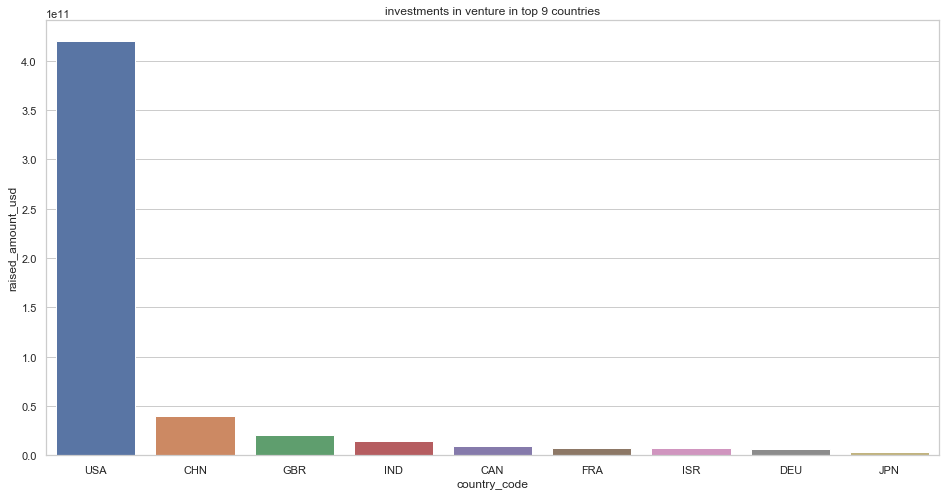

In [256]:
sns.set_style("whitegrid")

plt.figure(figsize=(16, 8))
plt.title('investments in venture in top 9 countries')
sns.barplot(x='country_code', y='raised_amount_usd', data=country_venture)

In [ ]:
# WE  CAN SEE THAT TOP 3 ENGLISH SPEAKING COUNTRIES ARE USA ,GBR AND IND

In [326]:
D1_plot=D1.groupby(['country_code','master_category']).count()
D1_final_values=D1_plot.sort_values('master_count',ascending=False).reset_index().head(3)
D1_final_values_plot=D1_final_values[['country_code','master_category','master_count']]

master_frame_country.groupby(['country_code','funding_round_type']).count()

In [322]:
D2_plot=D2.groupby(['country_code','master_category']).count()
D2_final_values=D2_plot.sort_values('master_count',ascending=False).reset_index().head(3)
D2_final_values_plot=D2_final_values[['country_code','master_category','master_count']]

In [323]:
D2_final_values_plot # top sectors in D2

,country_code,master_category,master_count
0,GBR,Others,126
1,GBR,Cleantech / Semiconductors,123
2,GBR,"Social, Finance, Analytics, Advertising",89


In [324]:
D3_plot=D3.groupby(['country_code','master_category']).count()
D3_final_values=D3_plot.sort_values('master_count',ascending=False).reset_index().head(3)
D3_final_values_plot=D3_final_values[['country_code','master_category','master_count']]
D3_final_values_plot

,country_code,master_category,master_count
0,IND,Others,77
1,IND,"News, Search and Messaging",41
2,IND,"Social, Finance, Analytics, Advertising",25


In [328]:
D1_D2_concatenated_frame=D1_final_values_plot.append(D2_final_values_plot,ignore_index=True)

In [330]:
top3_sectors_frame=D1_D2_concatenated_frame.append(D3_final_values_plot,ignore_index=True) #concatenating the thress frames

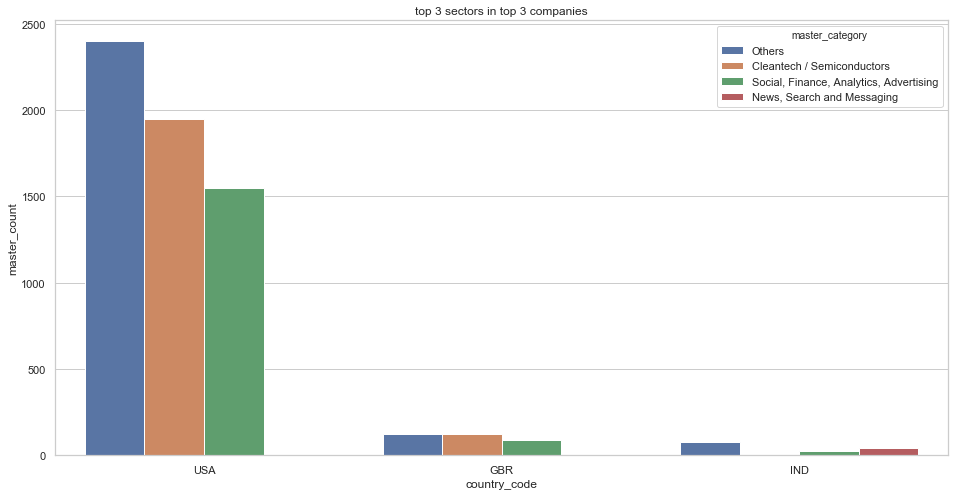

In [349]:
sns.set_style("whitegrid")

plt.figure(figsize=(16, 8))
plt.title('top 3 sectors in top 3 companies')
sns.barplot(x='country_code', y='master_count', hue= 'master_category', data=top3_sectors_frame)

In [ ]:
# WE CAN SEE THE TOP 3 COUNTRIES AND SECTORS 